<a href="https://colab.research.google.com/github/MK316/Spring2023/blob/main/DL/mini_DallE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini DallE from [https://github.com/kuprel/min-dalle](https://github.com/kuprel/min-dalle)

asof Apr 5, 2023

## Installation

In [1]:
! nvidia-smi
! pip install min-dalle

Wed Apr  5 06:01:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install torch
import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Model loading

Note: `float32` is faster than `float16` but uses more GPU memory.

In [3]:
dtype = "float16" #@param ["float32", "float16", "bfloat16"]
from IPython.display import display, update_display
import torch
from min_dalle import MinDalle

model = MinDalle(
    dtype=getattr(torch, dtype),
    device='cuda',
    is_mega=True, 
    is_reusable=True
)

using device cuda
downloading tokenizer params
intializing TextTokenizer
downloading encoder params
initializing DalleBartEncoder
downloading decoder params
initializing DalleBartDecoder
downloading detokenizer params
initializing VQGanDetokenizer


### Generate Images

- `grid_size` Size of the image grid.  Reduce this if you run out of GPU memory.

- `progressive_outputs` Whether to show intermediate output.  Adds a small delay and increases memory usage.

- `seamless` Tiles the images in token space instead of pixel space

- `supercondition_factor` Higher values result in better agreement with the text but a narrower variety of generated images

- `top_k` Each image token is sampled from the top $k$ most probable tokens

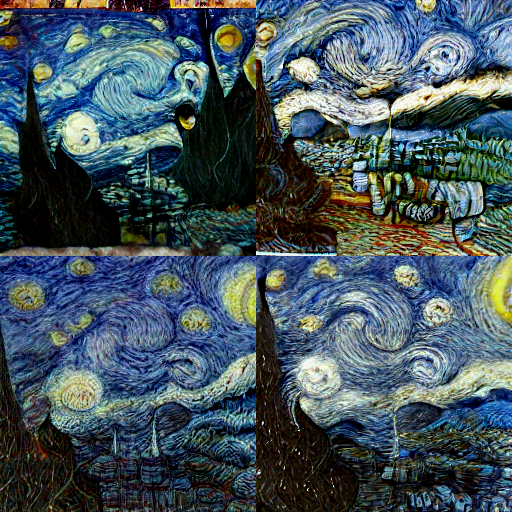

CPU times: user 14.6 s, sys: 360 ms, total: 15 s
Wall time: 15.1 s


In [42]:
%%time

text = "Gogh's oil painting of Starry night" #@param {type:"string"}
progressive_outputs = True #@param {type:"boolean"}
seamless = False #@param {type:"boolean"}
grid_size = 2 #@param {type:"integer"}
temperature = 5.57 #@param {type:"slider", min:0.01, max:16, step:0.01}
supercondition_factor = 16 #@param {type:"number"}
top_k = 128 #@param {type:"integer"}

image_stream = model.generate_image_stream(
    text=text,
    seed=-1,
    grid_size=grid_size,
    progressive_outputs=progressive_outputs,
    is_seamless=seamless,
    temperature=temperature,
    top_k=int(top_k),
    supercondition_factor=float(supercondition_factor)
)

is_first = True
for image in image_stream:
    display_image = display if is_first else update_display
    display_image(image, display_id=1)
    is_first = False

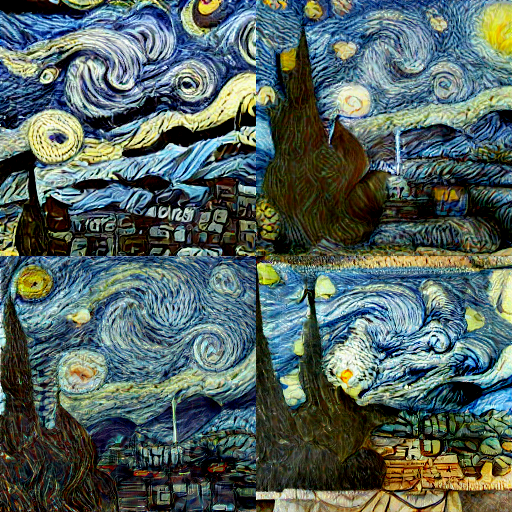

In [34]:
a1 = display_image(image, display_id=1)

In [44]:
images = model.generate_images(
    text="Gogh's oil painting of Starry night",
    seed=-1,
    grid_size=2,
    is_seamless=False,
    temperature=1,
    top_k=256,
    supercondition_factor=16,
    is_verbose=False
)